In [1]:
#from imblearn.over_sampling import SMOTE
import statistics as st
import numpy as np
import pandas as pd
from scipy.stats import variation
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, auc, classification_report
                            
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sn
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.datasets import make_classification


In [41]:
df_data = pd.read_csv('ticdata2000.txt',sep='\t', header = None)
df_eval = pd.read_csv('ticeval2000.txt',sep='\t', header = None)
df_tgts = pd.read_csv('tictgts2000.txt',sep='\t', header = None)


In [42]:
df_data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85],
           dtype='int64')

In [43]:
X = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
y = 85

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_data[X], df_data[y], test_size=0.3, random_state=42)

In [45]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, df_data[X], df_data[y], cv=5)
scores

array([0.93991416, 0.93991416, 0.94072165, 0.94072165, 0.93986254])

In [46]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.94 accuracy with a standard deviation of 0.00


In [47]:
scores = cross_val_score(clf, df_data[X], df_data[y], cv=5, scoring='f1_macro')
scores

array([0.48451327, 0.48451327, 0.48472776, 0.48472776, 0.48449956])

<h1>Naive Baies</h1>

In [8]:
naive = MultinomialNB()
naive.fit(X_test, y_test)

fitted = naive.predict(df_eval)

C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.45
- 3.3
- 3.4
- 3.5
- 3.6
- ...
Feature names seen at fit time, yet now missing:
- 1.13
- 2.5
- 2.6
- 5.2
- 5.3
- ...

  warnings.warn(message, FutureWarning)


C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.45
- 3.3
- 3.4
- 3.5
- 3.6
- ...
Feature names seen at fit time, yet now missing:
- 1.13
- 2.5
- 2.6
- 5.2
- 5.3
- ...

  warnings.warn(message, FutureWarning)
C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Recall =  0.6137296982073872
Precision =  0.5345037431603608
AUC =  0.6675801402720088


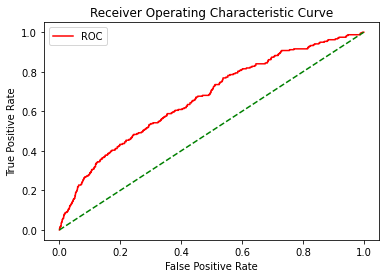

In [9]:
prob = naive.predict_proba(df_eval)
prob = prob[:, 1]
print('Recall = ', recall_score(df_tgts, fitted, average='macro'))

print('Precision = ' ,precision_score(df_tgts, fitted, average='macro'))

fpr, tpr, thresholds = metrics.roc_curve(df_tgts, fitted, pos_label=2)
print('AUC = ', metrics.roc_auc_score(df_tgts, prob))


def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()



fper, tper, thresholds = roc_curve(df_tgts, prob)
plot_roc_curve(fper, tper)

<h1>Regressão logistica</h1>

In [10]:
model = LogisticRegression(penalty='none', solver='newton-cg')

In [23]:
model.fit(X_test, y_test)

C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='none', solver='newton-cg')

In [24]:
yhat = model.predict_proba(df_eval)

C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.45
- 3.3
- 3.4
- 3.5
- 3.6
- ...
Feature names seen at fit time, yet now missing:
- 1.13
- 2.5
- 2.6
- 5.2
- 5.3
- ...

  warnings.warn(message, FutureWarning)


In [25]:
yhat = yhat[:, 1]

In [26]:
confusion_matrix(df_tgts, model.predict(df_eval))

C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.45
- 3.3
- 3.4
- 3.5
- 3.6
- ...
Feature names seen at fit time, yet now missing:
- 1.13
- 2.5
- 2.6
- 5.2
- 5.3
- ...

  warnings.warn(message, FutureWarning)


array([[3733,   28],
       [ 229,    9]], dtype=int64)

In [27]:
acuracia = accuracy_score(df_tgts, model.predict(df_eval))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.9357 de acurácia.


C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.45
- 3.3
- 3.4
- 3.5
- 3.6
- ...
Feature names seen at fit time, yet now missing:
- 1.13
- 2.5
- 2.6
- 5.2
- 5.3
- ...

  warnings.warn(message, FutureWarning)


In [28]:
print(classification_report(df_tgts, model.predict(df_eval)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3761
           1       0.24      0.04      0.07       238

    accuracy                           0.94      3999
   macro avg       0.59      0.52      0.52      3999
weighted avg       0.90      0.94      0.91      3999



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.45
- 3.3
- 3.4
- 3.5
- 3.6
- ...
Feature names seen at fit time, yet now missing:
- 1.13
- 2.5
- 2.6
- 5.2
- 5.3
- ...

  warnings.warn(message, FutureWarning)


In [29]:
print('AUC: %0.2f' % roc_auc_score(df_tgts, yhat))

AUC: 0.67


In [30]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

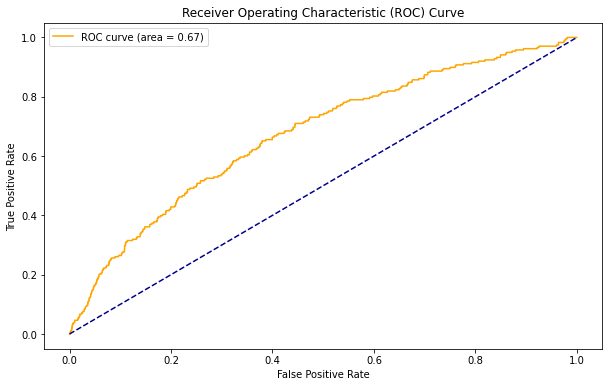

In [31]:
plot_roc_curve(df_tgts, yhat)